In [1]:
import pandas as pd

In [4]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
income_data = pd.read_csv('Data/adult.data.txt',names=cols)

In [5]:
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
income_data.Salary.value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

In [10]:
income_data.groupby(('sex','Salary')).size()

sex      Salary
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64

In [12]:
inf = pd.DataFrame({'Male<50K':[15128],'Male>50K':[6662],'FeMale<50K':[9592],'FeMale>50K':[1179]})

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

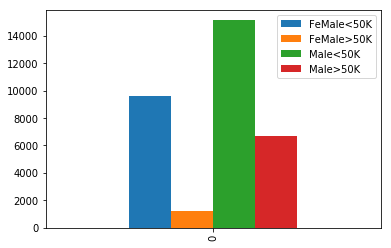

In [14]:
inf.plot.bar()

In [16]:
income_edu = income_data.groupby(('education-num','Salary')).size()

In [24]:
income_edu[16].index

Index([' <=50K', ' >50K'], dtype='object', name='Salary')

In [25]:
income_edu[16][' >50K']

306

In [30]:
import numpy as np
np.sum(income_edu[2].values)

168

In [31]:
income_edu[2][' >50K']

6

In [33]:
income_edu[2][' <=50K']

162

In [36]:
df = pd.DataFrame(income_edu)

In [50]:
l = income_edu.values.tolist()

In [46]:
income_edu[1][' >50K'] = 0

In [52]:
l.insert(1,0)

In [55]:
df = pd.DataFrame(l)

In [59]:
df

,0
0,51
1,0
2,162
3,6
4,317
5,16
6,606
7,40
8,487
9,27


C:\Users\awant\Anaconda3\lib\site-packages\pandas\core\generic.py:7067: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis, closed=closed)


ValueError: Invalid frequency: 2

In [70]:
in1 = income_data['education-num'].value_counts()

In [74]:
df1 = pd.DataFrame(in1)

In [75]:
df2 = pd.DataFrame(income_edu)

In [82]:
df2.reset_index('Salary',inplace=True)

In [86]:
df3 = df2.join(df1)

In [89]:
df3.rename(columns={0:'count'},inplace=True)

In [92]:
df3['pct'] = df3['count']/df3['education-num']

In [95]:
df3.reset_index(inplace=True)

In [98]:
df3.rename(columns={'index':'years'},inplace=True)

In [99]:
df3.drop(['count','education-num'],axis=1)

,years,Salary,pct
0,1,<=50K,1.000000
1,2,<=50K,0.964286
2,2,>50K,0.035714
3,3,<=50K,0.951952
4,3,>50K,0.048048
5,4,<=50K,0.938080
6,4,>50K,0.061920
7,5,<=50K,0.947471
8,5,>50K,0.052529
9,6,<=50K,0.933548


In [100]:
df3.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [101]:
df3[df3.Salary == ' >50K']

,years,Salary,count,education-num,pct
2,2,>50K,6,168,0.035714
4,3,>50K,16,333,0.048048
6,4,>50K,40,646,0.061920
8,5,>50K,27,514,0.052529
10,6,>50K,62,933,0.066452
12,7,>50K,60,1175,0.051064
14,8,>50K,33,433,0.076212
16,9,>50K,1675,10501,0.159509
18,10,>50K,1387,7291,0.190235
20,11,>50K,361,1382,0.261216
